In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('fatal-police-shootings-data.csv')

In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
df1 = df.pivot_table(values='manner_of_death', index ='race', columns ='signs_of_mental_illness', aggfunc='count')

In [5]:
df1.columns = ['not ill', 'ill']

In [6]:
def mental_illnes(row):
    value = row['ill'] / (row['ill'] + row['not ill']) 
    return round(value * 100, 2)

In [7]:
df1['%_mental_illnes'] = df1.apply(lambda row: mental_illnes(row), axis=1)


df1

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['day_of_week'] = df['date'].dt.day_name()

df.head()

In [10]:
df['day_no'] = df['date'].dt.weekday

### Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [11]:
count_days = df.pivot_table(index='day_of_week', values='day_no', aggfunc={'day_of_week':'count', 'day_no':'first'}).sort_values('day_no')

In [12]:
count_days

,day_no,day_of_week
day_of_week,,
Monday,0,726
Tuesday,1,816
Wednesday,2,829
Thursday,3,810
Friday,4,761
Saturday,5,721
Sunday,6,753


In [13]:
count_days.rename(columns={'day_of_week':'day_count'}, inplace=True)

In [14]:
import matplotlib.pyplot as plt

In [15]:
list(count_days.index)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Text(0, 0.5, '#Deaths')

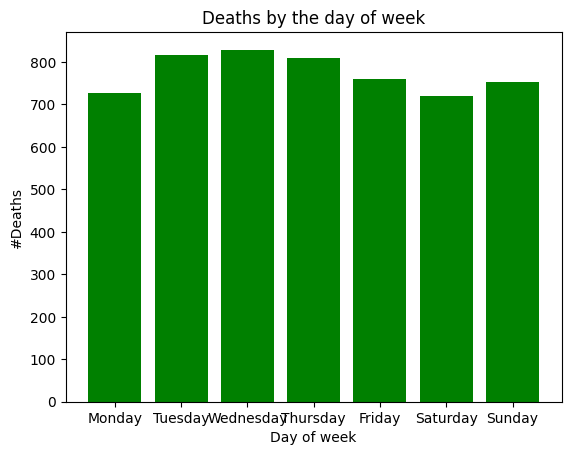

In [16]:
plt.bar(count_days.index, list(count_days['day_count']), color='green')
plt.title('Deaths by the day of week')
plt.xlabel("Day of week")
plt.ylabel("#Deaths")


### Zad 5. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów

In [17]:
import requests
url = 'https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
r = requests.get(url, headers=header)
df_population = pd.DataFrame(pd.read_html(r.text, header=0)[0])

C:\Users\szcze\AppData\Local\Temp\ipykernel_17216\2602980352.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_population = pd.DataFrame(pd.read_html(r.text, header=0)[0])


In [18]:
df_population

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%
5,6,5,Illinois,12812508,12830632,−0.1%,"−18,124",17,674343,753677,3.82%
6,7,7,Ohio,11799448,11536504,2.3%,+262944,15,694085,786630,3.52%
7,8,9,Georgia,10711908,9687653,10.6%,+1024255,14,669494,765136,3.20%
8,9,10,North Carolina,10439388,9535483,9.5%,+903905,14,652462,745671,3.12%
9,10,8,Michigan,10077331,9883640,2.0%,+193691,13,671822,775179,3.01%


In [19]:
 df_population = df_population[df_population['Rank in states & territories, 2020'] != '—']

#### Remove not needed columns

In [20]:
for column in df_population.columns:
    if column not in ['State', 'Census population, April 1, 2020 [1][2]']:
        df_population.drop(columns=column, axis=1, inplace=True)

In [21]:
df_population

,State,"Census population, April 1, 2020 [1][2]"
0,California,39538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700
5,Illinois,12812508
6,Ohio,11799448
7,Georgia,10711908
8,North Carolina,10439388
9,Michigan,10077331


In [22]:
import requests
url = 'https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
r2 = requests.get(url, headers=header)
df_abbr = pd.DataFrame(pd.read_html(r2.text, header=0)[1])

C:\Users\szcze\AppData\Local\Temp\ipykernel_17216\494274051.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_abbr = pd.DataFrame(pd.read_html(r2.text, header=0)[1])


In [23]:
df_abbr

,Name,Status of region,ISO,ANSI,USPS (& ANSI),USCG,GPO,AP,Court,Others
0,Name,Status of region,NaN,NaN,NaN,NaN,GPO,AP,Court,Others
1,United States of America,Federal state (not defined by USPS),US USA 840,0.0,US,NaN,U.S.,U.S.,U.S.,U.S.A.
2,Alabama,State,US-AL,1.0,AL,AL,Ala.,Ala.,Ala.,NaN
3,Alaska,State,US-AK,2.0,AK,AK,Alaska,Alaska,Alaska,Ak.[3]
4,Arizona,State,US-AZ,4.0,AZ,AZ,Ariz.,Ariz.,Ariz.,NaN
...,...,...,...,...,...,...,...,...,...,...
74,Nebraska,Obsolete postal code[g],NaN,NaN,NB,NaN,NaN,NaN,NaN,NaN
75,Northern Mariana Islands,Obsolete postal code[h],NaN,NaN,CM,NaN,NaN,NaN,NaN,NaN
76,Panama Canal Zone,Obsolete postal code,PZ PCZ 594,NaN,CZ,NaN,NaN,NaN,NaN,NaN
77,Philippine Islands,Obsolete postal code,PH PHL 608[12],NaN,PI,NaN,NaN,NaN,NaN,NaN


In [24]:
df_abbr.columns

Index(['Name', 'Status of region', 'ISO', 'ANSI', 'USPS (& ANSI)', 'USCG',
       'GPO', 'AP', 'Court', 'Others'],
      dtype='object')

In [25]:
for column in df_abbr.columns:
    if column not in ['Name', 'USPS (& ANSI)']:
        df_abbr.drop(columns=column, axis=1, inplace=True)

In [26]:
df_abbr

,Name,USPS (& ANSI)
0,Name,NaN
1,United States of America,US
2,Alabama,AL
3,Alaska,AK
4,Arizona,AZ
...,...,...
74,Nebraska,NB
75,Northern Mariana Islands,CM
76,Panama Canal Zone,CZ
77,Philippine Islands,PI


In [27]:
df_merge = pd.merge(df_population, df_abbr, how='left', right_on='Name', left_on='State')

In [28]:
df_merge.drop(columns='Name', axis=1, inplace=True)

In [29]:
df_merge.rename(columns={'Census population, April 1, 2020 [1][2]':'Population', 'USPS (& ANSI)':'State abbr.'}, inplace=True)

In [30]:
df_merge

,State,Population,State abbr.
0,California,39538223,CA
1,Texas,30145505,TX
2,Florida,21538187,FL
3,New York,20201249,NY
4,Pennsylvania,13002700,PA
5,Illinois,12812508,IL
6,Ohio,11799448,OH
7,Georgia,10711908,GA
8,North Carolina,10439388,NC
9,Michigan,10077331,MI


In [31]:
df_result = pd.merge(df, df_merge, left_on='state', right_on='State abbr.', how='left')

In [32]:
df_result

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week,day_no,State,Population,State abbr.
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,4,Washington,7705281,WA
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday,4,Oregon,4237256,OR
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday,5,Kansas,2937880,KS
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday,6,California,39538223,CA
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday,6,Colorado,5773714,CO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday,5,Missouri,6154913,MO
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday,5,California,39538223,CA
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday,0,Kansas,2937880,KS
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday,1,Illinois,12812508,IL


In [63]:
def incydent_per_k(row):
    return row['Population']/row['count']['manner_of_death']/1000
    

In [64]:
df_pivot = df_result.pivot_table(values='manner_of_death', index=['State', 'Population'], aggfunc=['count']).reset_index()

In [65]:
df_pivot['Death per k'] = df_pivot.apply(lambda row:incydent_per_k(row), axis=1).round(4)

In [66]:
df_pivot

,State,Population,count,Death per k
,,,manner_of_death,
0,Alabama,5024279,104,48.3104
1,Alaska,733391,39,18.8049
2,Arizona,7151502,254,28.1555
3,Arkansas,3011524,83,36.2834
4,California,39538223,799,49.4846
5,Colorado,5773714,195,29.6088
6,Connecticut,3605944,21,171.7116
7,Delaware,989948,13,76.1498
8,District of Columbia,689545,13,53.0419
